# Title : Analyzing Weather Data from OpenWeatherMap API

In [1]:
#pr2
import requests 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt

In [2]:
# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e' 

In [3]:
# https://openweathermap.org/api/one-call-3
# how	How to use api call 
# Construct the API URL
location ="pune"
api_url = f"http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={api_key}"

In [4]:
# Send a GET request to the API 
response = requests.get(api_url)
# print(response)
weather_data = response.json()
# print(weather_data)
# print(weather_data.keys())
# len(weather_data['list'])
# print(weather_data['list'])
print(weather_data['list'][0])
weather_data['list'][0]['weather'][0]['description']

{'dt': 1731358800, 'main': {'temp': 294.1, 'feels_like': 293.69, 'temp_min': 293.15, 'temp_max': 294.1, 'pressure': 1014, 'sea_level': 1014, 'grnd_level': 940, 'humidity': 55, 'temp_kf': 0.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'clouds': {'all': 4}, 'wind': {'speed': 1.47, 'deg': 81, 'gust': 1.78}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-11-11 21:00:00'}


'clear sky'

In [5]:
# Getting the data from dictionary and taking into one variable 
# Extract relevant weather attributes using list comprehension
# temperatures = [item['main']['temp'] for item in weather_data['list']] 

# It will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [6]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperature, 
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})
weather_df

,Timestamp,Temperature,humidity,wind_speed,weather_description
0,2024-11-11 21:00:00,294.10,55,1.47,clear sky
1,2024-11-12 00:00:00,292.69,60,1.26,clear sky
2,2024-11-12 03:00:00,295.16,55,2.61,clear sky
3,2024-11-12 06:00:00,300.25,37,4.00,clear sky
4,2024-11-12 09:00:00,302.53,29,2.84,clear sky
5,2024-11-12 12:00:00,300.25,37,1.54,scattered clouds
6,2024-11-12 15:00:00,296.91,41,1.27,broken clouds
7,2024-11-12 18:00:00,294.81,46,1.37,scattered clouds
8,2024-11-12 21:00:00,293.56,52,1.24,clear sky
9,2024-11-13 00:00:00,292.65,58,1.87,clear sky


In [7]:
# 5 Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")

Maximum Temperature - 304.51
Minimum Temperature - 292.65


In [8]:
# 4 Clean and preprocess the data # Handling missing values
weather_df.fillna(0, inplace=True) # Replace missing values with 0 or appropriate value

In [9]:
#4  Handling inconsistent format (if applicable)
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

In [10]:
# Convert temperature from Kelvin to Celsius
# Print the cleaned and preprocessed data print(weather_df)
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-11-11 21:00:00        20.95        55        1.47           clear sky
2024-11-12 00:00:00        19.54        60        1.26           clear sky
2024-11-12 03:00:00        22.01        55        2.61           clear sky
2024-11-12 06:00:00        27.10        37        4.00           clear sky
2024-11-12 09:00:00        29.38        29        2.84           clear sky
2024-11-12 12:00:00        27.10        37        1.54    scattered clouds
2024-11-12 15:00:00        23.76        41        1.27       broken clouds
2024-11-12 18:00:00        21.66        46        1.37    scattered clouds
2024-11-12 21:00:00        20.41        52        1.24           clear sky
2024-11-13 00:00:00        19.50        58        1.87           clear sky
2024-11-13 03:00:00        22.62        54        2.62           clear sky
2024-11-13 06:00:00      

In [11]:
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()


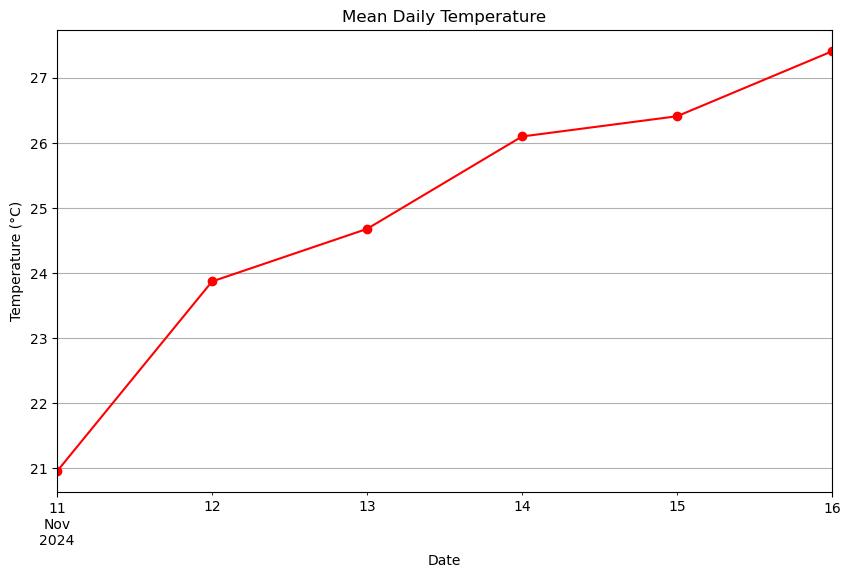

In [12]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

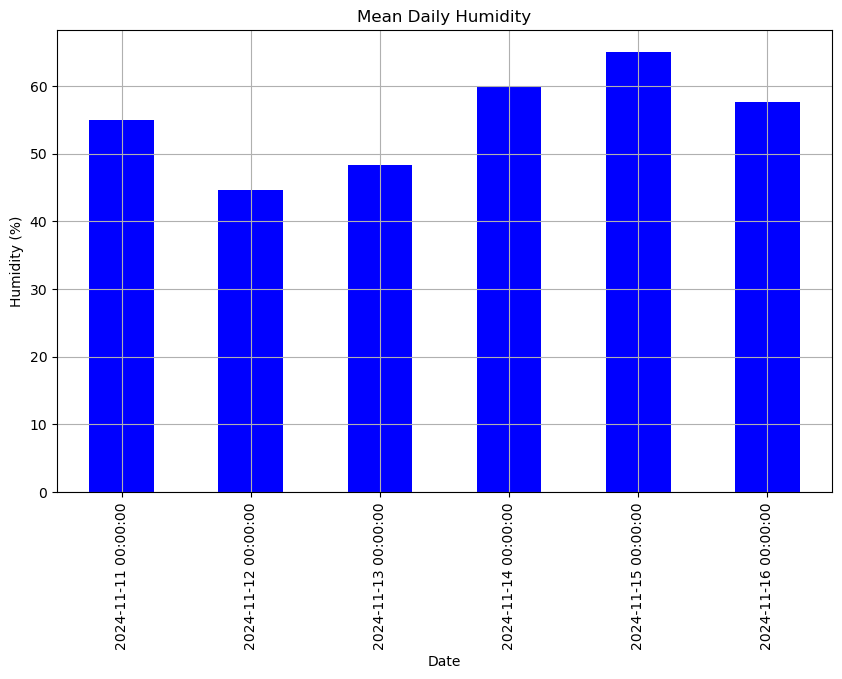

In [13]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

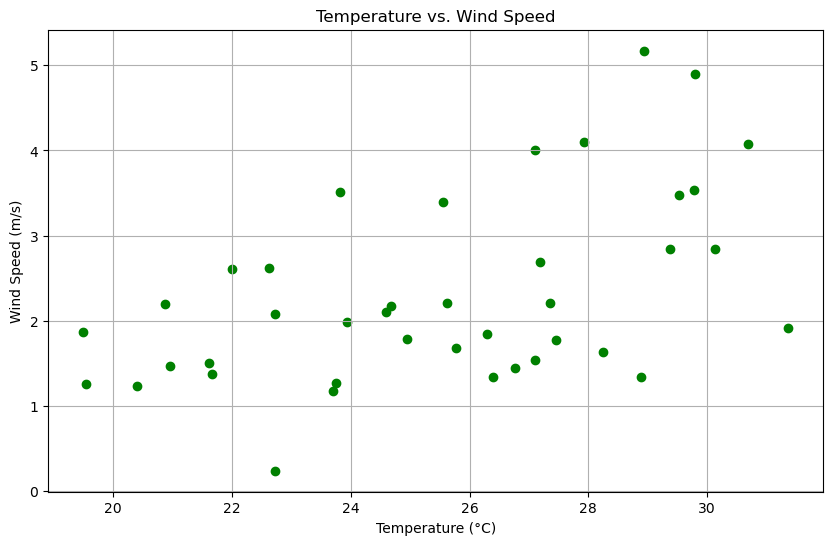

In [14]:
#10 Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

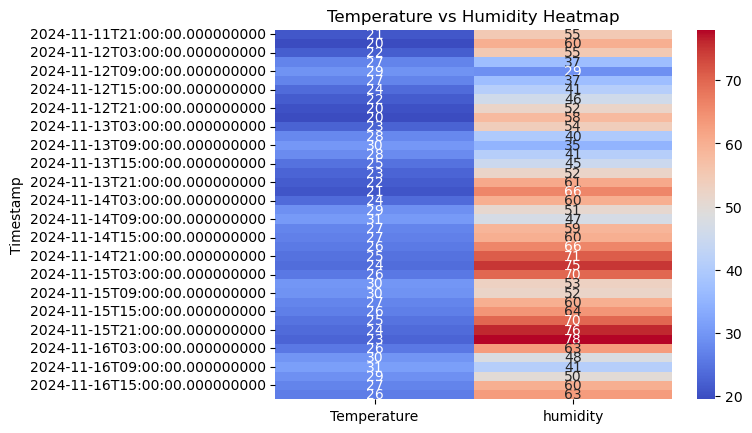

In [15]:
# Heatmap
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

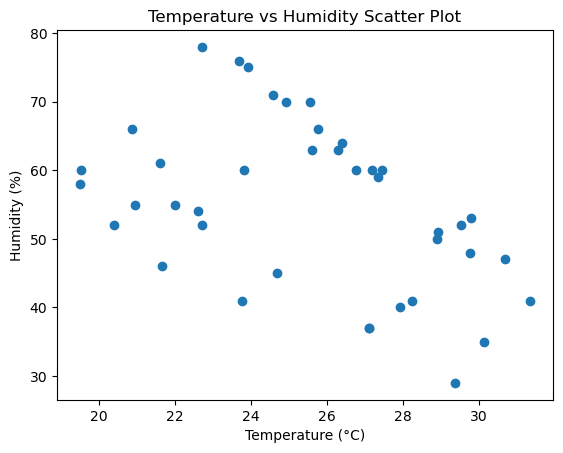

In [16]:
# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

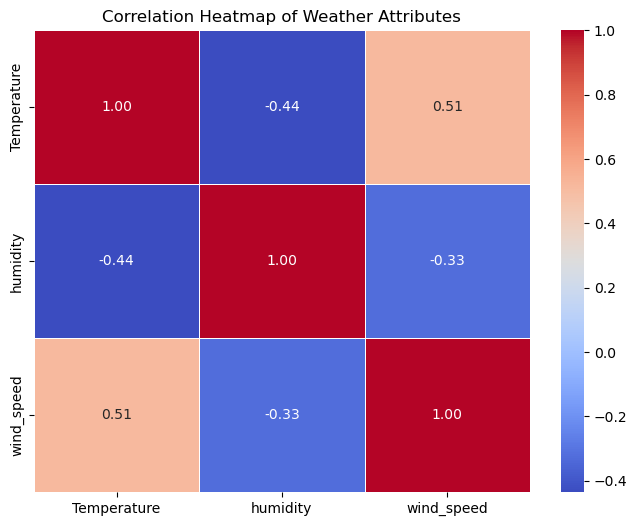

In [17]:
correlation_matrix = weather_df[['Temperature', 'humidity', 'wind_speed']].corr()
# weather_df.columns

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Attributes')
plt.show()